In [1]:
import http.client, urllib.request, urllib.parse, urllib.error, base64
import json
import pandas as pd
import numpy as np

In [8]:
df = pd.read_csv('BTS2013.csv', encoding = 'UTF8')

In [12]:
df

,fullname,html,id,like,replies,retweets,text,timestamp,url,user
0,Marcel Anthony,"<p class=""TweetTextSize js-tweet-text tweet-te...",348591176695304192,0,0,0,#BTS with #DIP #MMT model @_sadenicole hair an...,2013-06-22T23:59:47,/ImMarcelAnthony/status/348591176695304192,ImMarcelAnthony
1,มุนตุ่น,"<p class=""TweetTextSize js-tweet-text tweet-te...",348591104523898880,0,1,0,@BTS_JiN_BoTH ไม่เยอะไปหน่อยหรอคับผมมันรุ่น มิ...,2013-06-22T23:59:30,/MJupbap_/status/348591104523898880,MJupbap_
2,แบดแมนจอง,"<p class=""TweetTextSize js-tweet-text tweet-te...",348591067446259712,0,1,0,@BTS_JiN_BoTH เป็นครั้งแรกที่มันรักใครไปโดยไม่...,2013-06-22T23:59:21,/93DH_orz/status/348591067446259712,93DH_orz
3,X.,"<p class=""TweetTextSize js-tweet-text tweet-te...",348590930779054080,0,0,0,@angelica_bts el papa de abraham,2013-06-22T23:58:49,/XitlaGM/status/348590930779054080,XitlaGM
4,Go Anna,"<p class=""TweetTextSize js-tweet-text tweet-te...",348590912277987328,0,0,0,@mrV_bts follback?,2013-06-22T23:58:44,/ggyoonaw/status/348590912277987328,ggyoonaw
5,2PM Hungary Fans,"<p class=""TweetTextSize js-tweet-text tweet-te...",348590855801696257,0,0,0,[BTS] MBC 'We Got Married' Global Edition Maki...,2013-06-22T23:58:31,/2PMFans/status/348590855801696257,2PMFans
6,soclos,"<p class=""TweetTextSize js-tweet-text tweet-te...",348590852081324033,0,0,0,"@JINOBTS bts semua kosong , mau join?:)",2013-06-22T23:58:30,/xoxoclosed/status/348590852081324033,xoxoclosed
7,dasomieee[LH],"<p class=""TweetTextSize js-tweet-text tweet-te...",348590714642391040,0,0,0,@mrV_bts followed ^^,2013-06-22T23:57:57,/sstardasom_93/status/348590714642391040,sstardasom_93
8,ᴀᴀ oxer,"<p class=""TweetTextSize js-tweet-text tweet-te...",348590713337966592,0,0,0,BTS - No More Dream,2013-06-22T23:57:57,/chrsdpr/status/348590713337966592,chrsdpr
9,yeri,"<p class=""TweetTextSize js-tweet-text tweet-te...",348590647776792576,0,0,0,@mrV_bts donee,2013-06-22T23:57:41,/yergeum_i/status/348590647776792576,yergeum_i


In [13]:
import nltk 

In [15]:
tokens = nltk.word_tokenize(df['text'][0]) # 첫번째 행의 뉴스 내용에서 토큰 추출
tokens

['#',
 'BTS',
 'with',
 '#',
 'DIP',
 '#',
 'MMT',
 'model',
 '@',
 '_sadenicole',
 'hair',
 'and',
 'makeup',
 'by',
 '@',
 'swankey_gena',
 'http',
 ':',
 '//instagram.com/p/a4WazcxAHb/']

In [16]:
tokens = [token.lower() for token in tokens if len(token) > 1]
tokens

['bts',
 'with',
 'dip',
 'mmt',
 'model',
 '_sadenicole',
 'hair',
 'and',
 'makeup',
 'by',
 'swankey_gena',
 'http',
 '//instagram.com/p/a4wazcxahb/']

In [17]:
tokens_bigram = nltk.bigrams(tokens)
for token in tokens_bigram :
    print(token)

('bts', 'with')
('with', 'dip')
('dip', 'mmt')
('mmt', 'model')
('model', '_sadenicole')
('_sadenicole', 'hair')
('hair', 'and')
('and', 'makeup')
('makeup', 'by')
('by', 'swankey_gena')
('swankey_gena', 'http')
('http', '//instagram.com/p/a4wazcxahb/')


In [18]:
from nltk.corpus import stopwords

In [19]:
stop_words = stopwords.words('english')
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [20]:
tokens_clean = [token for token in tokens if not token in stop_words]
tokens_clean

['bts',
 'dip',
 'mmt',
 'model',
 '_sadenicole',
 'hair',
 'makeup',
 'swankey_gena',
 'http',
 '//instagram.com/p/a4wazcxahb/']

In [21]:
tokens_tagged = nltk.pos_tag(tokens_clean)
print(tokens_tagged)


[('bts', 'NNS'), ('dip', 'VBP'), ('mmt', 'JJ'), ('model', 'NN'), ('_sadenicole', 'NNP'), ('hair', 'NN'), ('makeup', 'NN'), ('swankey_gena', 'NN'), ('http', 'NN'), ('//instagram.com/p/a4wazcxahb/', 'NN')]


In [22]:
tokens_noun = [word for word, pos in tokens_tagged if pos in ['NN', 'NNP']]
print(tokens_noun)

['model', '_sadenicole', 'hair', 'makeup', 'swankey_gena', 'http', '//instagram.com/p/a4wazcxahb/']


In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [24]:
stopwords = set(STOPWORDS)
wc = WordCloud(background_color="white", max_font_size=100, max_words=50, stopwords=stopwords)

In [26]:
text_data = df['text'].str.cat(sep=', ')
wordcloud = wc.generate(text_data)

(-0.5, 399.5, 199.5, -0.5)

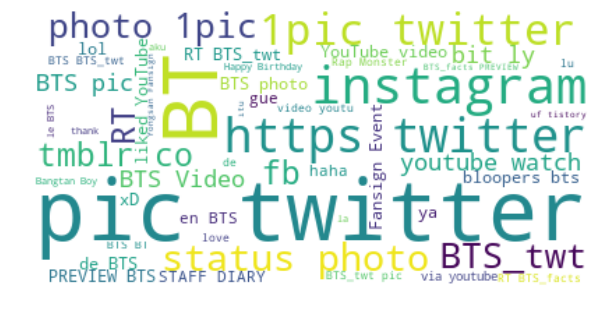

In [27]:
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')